# Lab 7 : Classification
May 2nd 2022

<u>Instructions: </u> Use this notebook and fill in the blank during the lab. At the end of the class, export your document (with the name of both team members) and make a deposit on Moodle. Do not forget to run your code before exporting so that all your figures and results are shown ! You may also choose to make a pdf export to check that everything looks fine.

## Exercice A: Make your own KNN algorithm and apply it to the Fisher Iris dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix

<u>Question 1</u>: Open the iris dataset from the "iris.csv" file. Then like in the previous labs, store the columns with the 4 attributes in a variable named "X", and the column with the classes in a variable named "Y".

In [8]:
iris = pd.read_csv('iris.csv')
X= iris.drop(['Class'],axis=1).to_numpy()
Y = iris['Class'].to_numpy()

You will now get to implement your own KNN algorithm like we have seen in class. To do so, you will have to implement two functions:

The first function "ClassifyNN" takes as input a single data observation "X" and 3 parameters. It then returns the class associated to the data "X". The second function "MyKNN" takes a whole dataset as input "testX" and 3 parameters. It is then supposed to return a vector "testY" of a size identical to "testX" and that will contain the classes to associate each observation to its correct class. Obviously, your function "MyKNN" will call your other function "ClassifyNN".

<u>Question 2</u> : Explain what the variables "trainX", "trainY" and "K" are for both these functions. What conditions should be tested between "trainX" and "testX", and between "trainX" and "trainY" ? Make sure to implement these tests in your function "MyKNN".

<u>Question 3:</u> Implement the two functions to get your own KNN algorithm. Below are a few guidelines to make the exercise easier. You may or may not follow them:
- We suggest that all inputs and outputs of your two functions should be numpy arrays. If you chose another typing, please try not to mix too much.
- For string classes, it is possible to use sets or regular python lists to make your loops.
- The function "euclidean_distance" from "sklearn.metrics.pairwise" can be useful to make your code lighter and have less loops.
- In Python, you may use "max(lst,key=lst.count)" to extract the element of list "lst" which has the most occurence in said list.

In [9]:
def ClassifyNN(X, trainX, trainY, K=1):
    C="-1"
    NN = np.zeros(K)
    for k in range(0,K):
        NN[k]=-1
    
    #searching for the K nearest neighhbors
    D=euclidean_distances([X],trainX)
    for k in range(0,K):
       mindist=np.infty
       for i in range(0,len(trainX)):
           
           if k==0:
               if(D[0][i]<mindist):
                   mindist=D[0][i]
                   NN[k]=i
           else:
                if(D[0][i]<mindist and not(i in NN) ):
                   mindist=D[0][i]
                   NN[k]=i                
    
    #classification
    classes= []
    for k in range(0,K):
        classes.append(trainY[NN[k].astype(int)])
    C=max(classes,key=classes.count)
        
    return C

In [10]:
def MyKNN(testX, trainX, trainY, K=1):
    
    if len(trainX)!=len(trainY) or len(trainX[0])!=len(testX[0]):
        return -1
    
    testY = []
    
    for i in range(0,len(testX)):
        testY.append(ClassifyNN(testX[i],trainX,trainY,K))
           
    
    return np.array(testY) 

<u>Question 4</u>: Test your functions using the following code. You pay have to adapt it a bit if you did not follow the types recommendations.

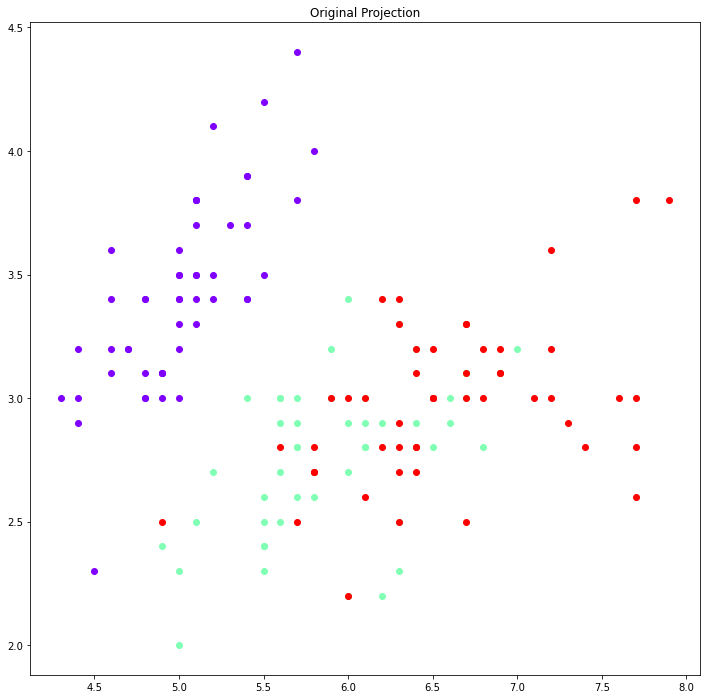

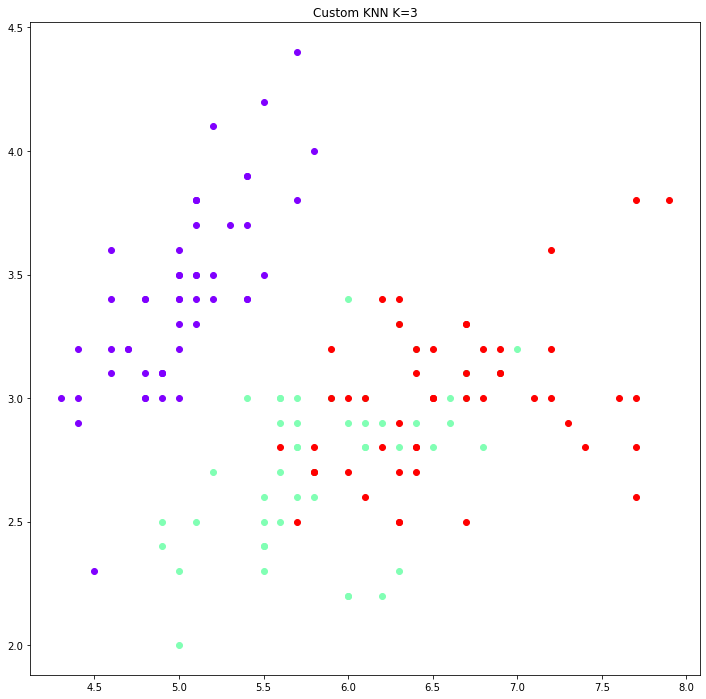

In [11]:
#what do this print ?
fig, ax = plt.subplots(figsize=(12,12))  
unique_labels = set(Y)
n_clusters = len(unique_labels)
colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]
for klass, color in zip(unique_labels, colors):
    Xk=X[Y == klass]   
    ax.scatter(Xk[:,0], Xk[:,1], color=color)   
plt.title("Original Projection")
plt.show()


K=3 #change the K here
#explain these parameters
res=MyKNN(X,X,Y,K)

#what does this print ?
fig, ax = plt.subplots(figsize=(12,12))  
for klass, color in zip(unique_labels, colors):
    Xk=X[res == klass]   
    ax.scatter(Xk[:,0], Xk[:,1], color=color)   
plt.title("Custom KNN K=%d" % K )
plt.show()

<u>Question 5</u>: Explain what this code does. In particular focus on the parameters given to your function "MyKNN" and the display loops to explain what they display exactly.

<u>Question 6</u>: Re-apply your code for K={1,3,5,7} and display the corresponding contingency matrices (you do not have to plot the results). Conclude on the value of K that gives the best results. Comment.

In [12]:
K=1
res=MyKNN(X,X,Y,K)

#todo contingency matrix
tab=contingency_matrix(Y,res)
print(tab)

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [13]:
K=3
res=MyKNN(X,X,Y,K)

#todo contingency matrix
tab=contingency_matrix(Y,res)
print(tab)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [14]:
K=5
res=MyKNN(X,X,Y,K)

#todo contingency matrix
tab=contingency_matrix(Y,res)
print(tab)

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [14]:
K=7
res=MyKNN(X,X,Y,K)

#todo contingency matrix
tab=contingency_matrix(Y,res)
print(tab)

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


<u>Question 7</u>: In the code above, the same parameter "X" was fed for both the "trainX" and "testX" parameters of your "MyKNN" function. Is this practice standard in Machine Learning ? If yes, explain why. If no, explain what should have been done.

## Exercise B: Predicting Death in the Titanic using Decision trees

In this exercise, based on a real reconstruction of the Titanic passenger list, we will try to predict who survives and who dies based on the various known informations about the passengers.

### I. Presenting the data

In [17]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<u>Question 1</u>: Open the file "titanic_full.csv" and display the following informations:
- The 5 first lines of the dataset
- The size of the data matrix (lines, columns)
- The types of the different variables
- A description of each attribute charactestics: min, max, quartiles, mean value and standard deviation

In [21]:
#open the file and display the 5 first lines
df = pd.read_csv('titanic_full.csv',index_col=0)
df.head()

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#display the size of the data frame
df.shape

(891, 12)

In [24]:
#display the types of the different variables
df.dtypes

Survived      int64
Pclass        int64
Name         object
FullName     object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [28]:
#variables characteristics
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<u>Question 2</u>: One major issue with this dataset reconstruction are the missing data. For each variable, display how many data are missing. Comment.

In [29]:
#display the missing data for each column
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
FullName      0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<u>Question 3</u>: Using either seaborn or pyplot, display the following:
- The cloud points of the different numerical variables. You may want to exclude the cabine number, which is numerical, but irrelevant.
- The age distribution on board
- A histogram with the percentages of survivors and dead people
- A pie plot for the class distribution of the passengers (Pclass variable)
- A pie plot for the repartition between males and females regardless of age
- A pie plot for the repartition between children, adult males (anyone below 18yo), and adult females. You will comment on how you handled missing data for the age.

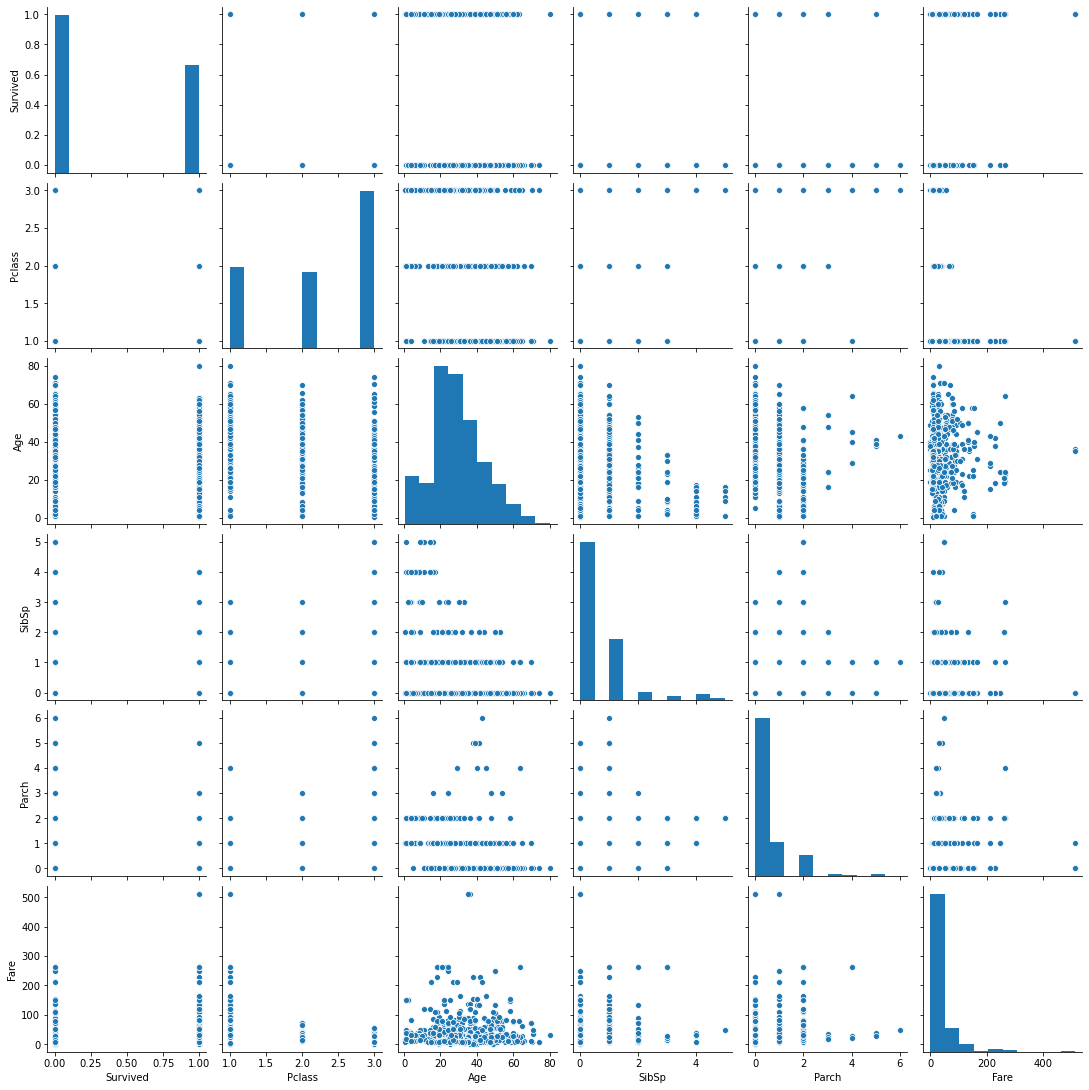

In [30]:
#Cloud point
sns.pairplot(df.drop(["Cabin"],axis=1).dropna())

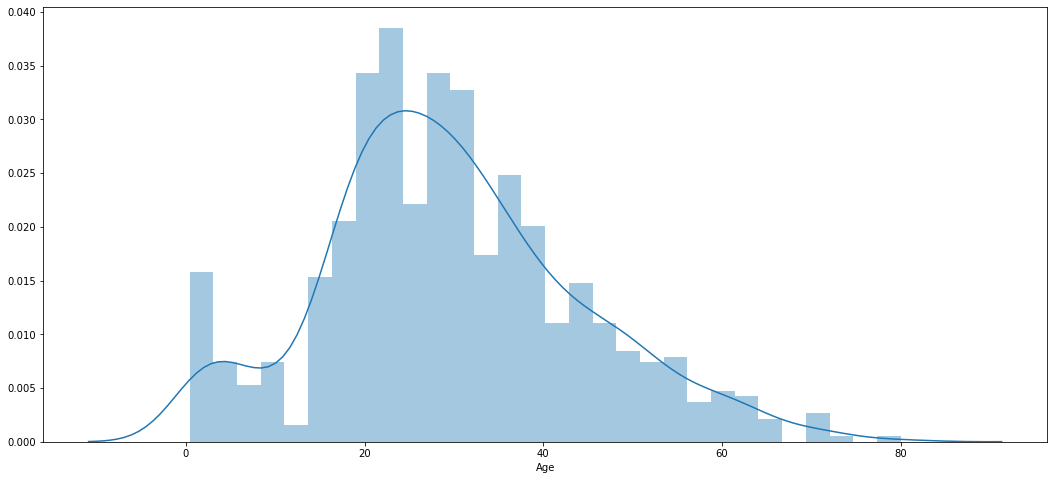

In [31]:
#age distribution
fig, ax = plt.subplots(figsize=(18, 8))
sns.distplot(df['Age'], bins=30, ax=ax)
plt.show()

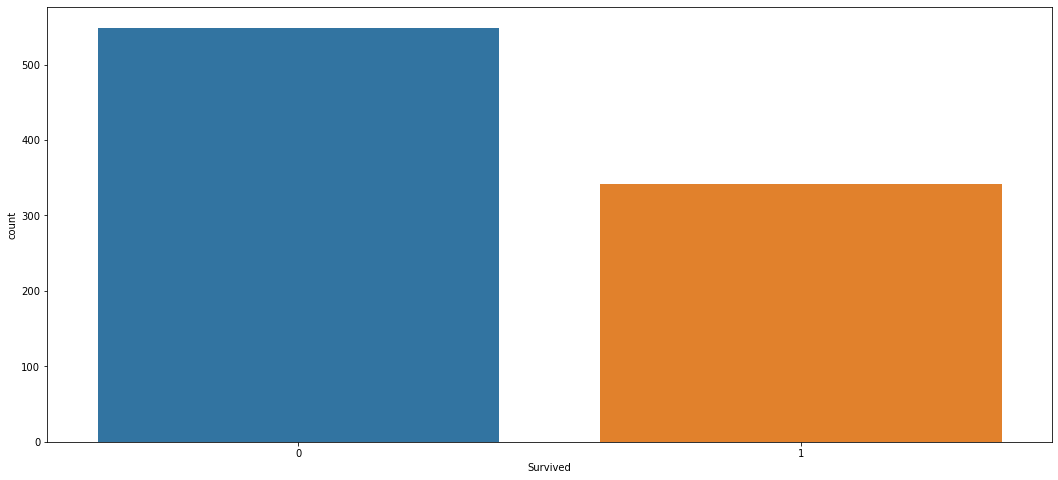

In [32]:
#survived or died
fig, ax = plt.subplots(figsize=(18, 8))
sns.countplot(df['Survived'])
plt.show()

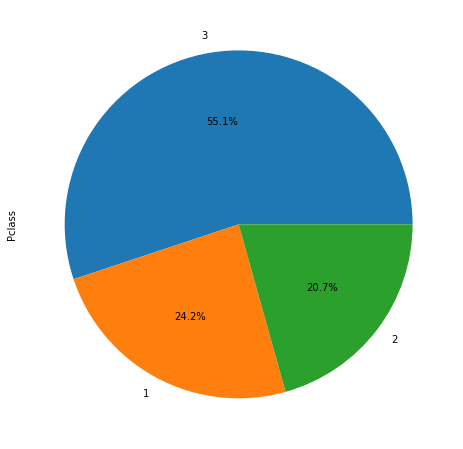

In [33]:
#class repartition
fig, ax = plt.subplots(figsize=(18, 8))
df["Pclass"].value_counts().plot.pie(autopct="%.1f%%");
plt.show()

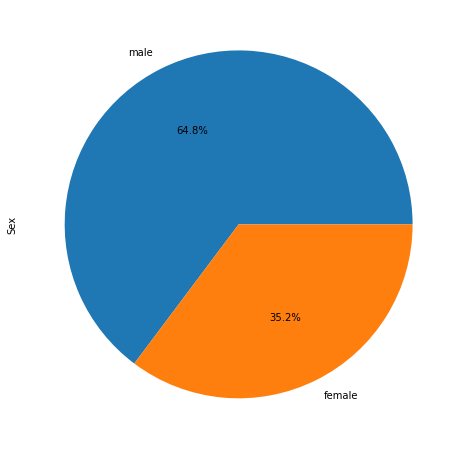

In [34]:
#males vs females
fig, ax = plt.subplots(figsize=(18, 8))
df["Sex"].value_counts().plot.pie(autopct="%.1f%%");
plt.show()

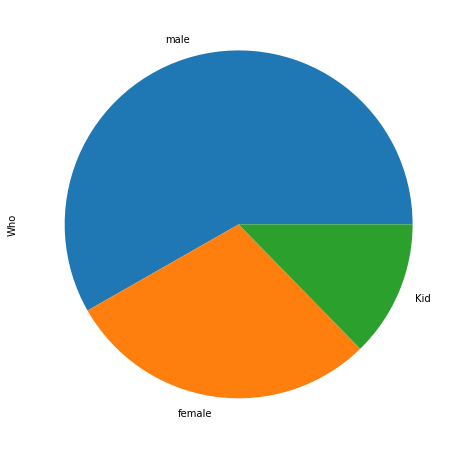

In [35]:
#males, females and kids
df["Who"]=df["Sex"]
df["Who"][df['Age'] < 18]="Kid"

fig, ax = plt.subplots(figsize=(18, 8))
df["Who"].value_counts().plot.pie();
plt.show()

<u>Question 4</u>: Display 2 histograms showing the repartitions of persons who died or survived:
- In the first histogram, display it as a function of the class
- In the second histogram, display it as a function of if they were children, females or males

Comment.

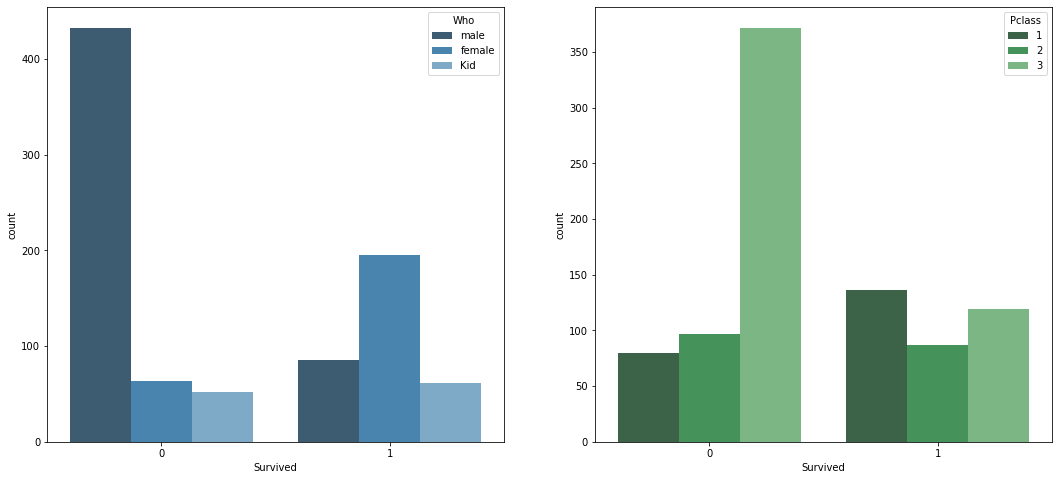

In [36]:
fig,axes = plt.subplots(1,2,figsize=(18,8))
sns.countplot(x="Survived",data=df,hue='Who',palette="Blues_d",ax=axes[0]) 
sns.countplot(x="Survived",data=df,hue='Pclass',palette="Greens_d",ax=axes[1]) 

### II. Decision trees

Finally, we will now use decision tree to make our prediction attempts.
First, we import all the needed packages.

In [38]:
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

We then prepare the data and select the predictors that we are going to use.
Since most sklearn algorithms prefer numerical data, we will also make a few changes.

In [40]:
df["Male"]=df["Sex"]
df["Male"][df['Sex'] == "male"]=1
df["Male"][df['Sex'] != "male"]=0

df["Kid"]=df["Sex"]
df["Kid"][df['Who'] == "Kid"]=1
df["Kid"][df['Who'] != "Kid"]=0

target_labels=df.Survived
train_predictor_columns = ['Pclass', 'Fare', 'Male', 'Kid'] #we will predict from the variables
train_feats = df[train_predictor_columns]

<u>Question 5</u>: What does the code below do ? Explain the role of each variable that the "train_test_split" function creates as well as the different parameters.

In [41]:
x_train,x_test,y_train,y_test  = train_test_split(train_feats,target_labels, test_size=0.2, random_state = 0)

We will now train a decision tree with a depth of 3

In [42]:
clf =tree.DecisionTreeClassifier(max_depth=3) #On peut jouer sur la profondeur de l'arbre ici
clf=clf.fit(x_train, y_train)

<u>Question 6</u>: Using the "classification_report" function from "metrics" with the right parameters, display the metrics associated with this decision tree and comment. In particular, explain what are the different metrics proposed.

In [43]:
y_pred = clf.predict(x_train[train_predictor_columns])
#display the metrics
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       439
           1       0.80      0.70      0.75       273

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712



The code below will display the trained decision tree:

[Text(334.8, 570.7800000000001, 'X[2] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(167.4, 407.70000000000005, 'X[0] <= 2.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(83.7, 244.62, 'X[1] <= 28.856\ngini = 0.114\nsamples = 132\nvalue = [8, 124]'),
 Text(41.85, 81.53999999999996, 'gini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.049\nsamples = 79\nvalue = [2, 77]'),
 Text(251.10000000000002, 244.62, 'X[1] <= 23.35\ngini = 0.499\nsamples = 115\nvalue = [55, 60]'),
 Text(209.25, 81.53999999999996, 'gini = 0.471\nsamples = 92\nvalue = [35, 57]'),
 Text(292.95, 81.53999999999996, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(502.20000000000005, 407.70000000000005, 'X[1] <= 26.269\ngini = 0.31\nsamples = 465\nvalue = [376, 89]'),
 Text(418.5, 244.62, 'X[3] <= 0.5\ngini = 0.241\nsamples = 335\nvalue = [288, 47]'),
 Text(376.65000000000003, 81.53999999999996, 'gini = 0.205\nsamples = 310\nvalue = [274, 

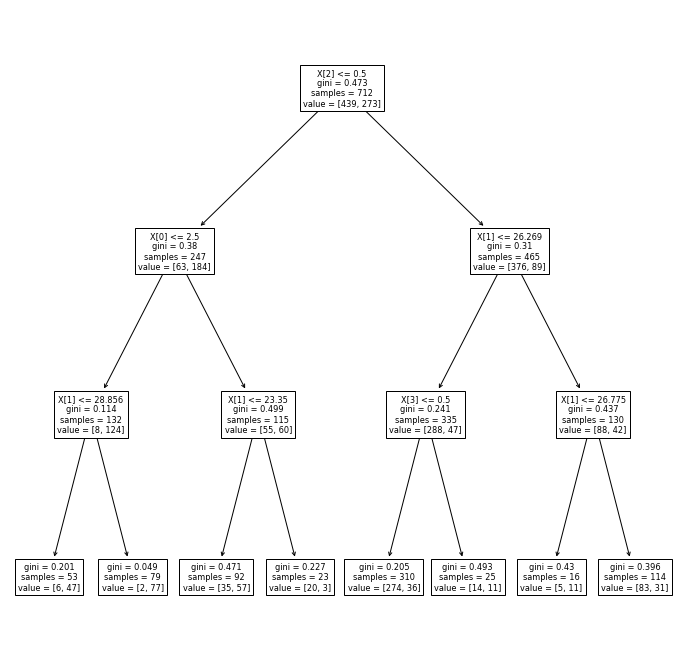

In [46]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf)

<u>Question 7</u>: Apply the same decision tree to your test set for a prediction task and generate the associated quality metric. Comment your results by comparison with the training prediction values.

In [47]:
y_pred = clf.predict(x_test[train_predictor_columns])
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### III. Naive Bayes

Now that you know how to use a classifier from scikitlearn, there is one more thing that you should know : All classifiers in sklearn works in the same way and follow the same syntax. You can therefore apply any classifier to the same probably with relative ease. We will try with Naive Bayes:

In [48]:
from sklearn.naive_bayes import GaussianNB

<u>Question 8</u>: Using the "GaussianNB" function, train a Naive Bayes classifier on the same training data and display its quality metrics using "classification_report". You will use the same predictors than for the decision tree.

In [49]:
gnbModel=GaussianNB()
gnbModel=gnbModel.fit(x_train, y_train)
y_pred = gnbModel.predict(x_train[train_predictor_columns]) 
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       439
           1       0.73      0.74      0.73       273

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



<u>Question 9</u>: Now that your model is trained, apply it to the test data and display the quality metrics using "classification_report".

In [50]:
y_pred = gnbModel.predict(x_test[train_predictor_columns])
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       110
           1       0.70      0.75      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



<u>Question 10</u>: Comment your results and compare them with the ones from the decision tree.